___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# Finance Data Project 

In this data project we will focus on exploratory data analysis of stock prices. Keep in mind, this project is just meant to practice your visualization and pandas skills, it is not meant to be a robust financial analysis or be taken as financial advice.
____
We'll focus on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

## Get the Data

### The Imports

In [94]:
pip install pandas-datareader

Note: you may need to restart the kernel to use updated packages.


In [95]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
%matplotlib inline

## Data

We need to get data using pandas datareader. We will get stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

** Figure out how to get the stock data from Jan 1st 2006 to Jan 1st 2016 for each of these banks. Set each bank to be a separate dataframe, with the variable name for that bank being its ticker symbol. This will involve a few steps:**
1. Use datetime to set start and end datetime objects.
2. Figure out the ticker symbol for each bank.
2. Figure out how to use datareader to grab info on the stock.

In [2]:
df = pd.read_pickle('all_banks') 
df.head()

Bank Ticker    BAC                                     C                       \
Stock Info    Open   High    Low  Close    Volume   Open   High    Low  Close   
Date                                                                            
2006-01-03   46.92  47.18  46.15  47.08  16296700  490.0  493.8  481.1  492.9   
2006-01-04   47.00  47.24  46.45  46.58  17757900  488.6  491.0  483.5  483.8   
2006-01-05   46.58  46.83  46.32  46.64  14970900  484.4  487.8  484.0  486.2   
2006-01-06   46.80  46.91  46.35  46.57  12599800  488.8  489.0  482.0  486.2   
2006-01-09   46.72  46.97  46.36  46.60  15620000  486.0  487.4  483.0  483.9   

Bank Ticker           ...     MS                                  WFC         \
Stock Info    Volume  ...   Open   High    Low  Close   Volume   Open   High   
Date                  ...                                                      
2006-01-03   1537660  ...  57.17  58.49  56.74  58.31  5377000  31.60  31.98   
2006-01-04   1871020  ...  58.70  59.28  58.35  58.35  7977800  31.80  31.82   
2006-01-05   1143160  ...  58.55  58.59  58.02  58.51  5778000  31.50  31.56   
2006-01-06   1370250  ...  58.77  58.85  58.05  58.57  6889800  31.58  31.78   
2006-01-09   1680740  ...  58.63  59.29  58.62  59.19  4144500  31.68  31.82   

Bank Ticker                          
Stock Info     Low  Close    Volume  
Date                                 
2006-01-03   31.20  31.90  11016400  
2006-01-04   31.36  31.53  10871000  
2006-01-05   31.31  31.50  10158000  
2006-01-06   31.38  31.68   8403800  
2006-01-09   31.56  31.68   5619600  

[5 rows x 30 columns]

In [3]:
start = datetime.datetime (2006,1,1)
end = datetime.datetime (2016,1,1)

In [4]:
BAC = data.DataReader("BAC", 'stooq', start, end)
C = data.DataReader("C", 'stooq', start, end)
GS = data.DataReader("GS", 'stooq', start, end)
JPM = data.DataReader("JPM", 'stooq', start, end)
MS = data.DataReader("MS", 'stooq', start, end)
WFC = data.DataReader("WFC", 'stooq', start, end)

** Create a list of the ticker symbols (as strings) in alphabetical order. Call this list: tickers**

In [5]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

** Use pd.concat to concatenate the bank dataframes together to a single data frame called bank_stocks. Set the keys argument equal to the tickers list. Also pay attention to what axis you concatenate on.**

In [6]:
bank_stocks = pd.concat([BAC,C,GS,JPM,MS,WFC], axis = 1, keys = tickers)
bank_stocks

BAC                                            C           \
              Open    High     Low   Close      Volume     Open     High   
Date                                                                       
2006-01-03  40.210  40.429  39.550  40.347  19015870.0  418.500  421.720   
2006-01-04  40.279  40.487  39.806  39.918  20721009.0  417.320  419.360   
2006-01-05  39.918  40.134  39.697  39.971  17296502.0  413.700  416.610   
2006-01-06  40.106  40.200  39.723  39.909  14696272.0  417.480  417.620   
2006-01-09  40.038  40.253  39.730  39.936  18225560.0  415.070  416.260   
...            ...     ...     ...     ...         ...      ...      ...   
2015-12-24  15.325  15.380  15.237  15.281  33195780.0   45.123   45.543   
2015-12-28  15.237  15.246  15.024  15.157  47170877.0   45.198   45.198   
2015-12-29  15.264  15.354  15.186  15.288  51566649.0   45.362   45.758   
2015-12-30  15.221  15.255  15.078  15.088  39582761.0   45.432   45.517   
2015-12-31  15.052  15.104  14.891  14.891  53196802.0   44.768   45.042   

                                          ...      MS                          \
                Low    Close      Volume  ...    Open    High     Low   Close   
Date                                      ...                                   
2006-01-03  410.880  420.970   1800359.0  ...  38.544  39.431  38.249  39.308   
2006-01-04  412.920  413.190   2190666.0  ...  39.576  39.967  39.340  39.340   
2006-01-05  413.360  415.220   1329263.0  ...  39.340  39.503  39.111  39.447   
2006-01-06  411.660  415.220   1604360.0  ...  39.623  39.674  39.137  39.487   
2006-01-09  412.500  413.270   1967959.0  ...  39.525  39.974  39.518  39.900   
...             ...      ...         ...  ...     ...     ...     ...     ...   
2015-12-24   45.097   45.317   5433079.0  ...  27.916  28.038  27.803  27.840   
2015-12-28   44.674   45.034  10189165.0  ...  27.738  27.738  27.384  27.573   
2015-12-29   45.343   45.552  11809564.0  ...  27.803  28.030  27.706  27.899   
2015-12-30   44.925   44.966  10191044.0  ...  27.859  27.982  27.600  27.625   
2015-12-31   44.493   44.493  13110073.0  ...  27.348  27.685  27.229  27.266   

                          WFC                                      
               Volume    Open    High     Low   Close      Volume  
Date                                                               
2006-01-03  6620838.0  23.173  23.450  22.880  23.392  15023198.0  
2006-01-04  9823270.0  23.316  23.331  22.995  23.121  14823553.0  
2006-01-05  7114603.0  23.098  23.135  22.957  23.098  13816039.0  
2006-01-06  8483585.0  23.160  23.297  23.019  23.229  11460363.0  
2006-01-09  5103226.0  23.229  23.331  23.135  23.229   7663520.0  
...               ...     ...     ...     ...     ...         ...  
2015-12-24  3264599.0  45.677  45.776  45.461  45.551   6016513.0  
2015-12-28  6323803.0  45.326  45.518  45.013  45.438   9974923.0  
2015-12-29  7453119.0  45.792  45.993  45.694  45.942   9501034.0  
2015-12-30  5900158.0  45.926  45.959  45.530  45.610   9647734.0  
2015-12-31  9507447.0  45.297  45.660  45.052  45.171  13152930.0  

[2517 rows x 30 columns]

** Set the column name levels (this is filled out for you):**

In [7]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

** Check the head of the bank_stocks dataframe.**

In [8]:
bank_stocks.head()

Bank Ticker     BAC                                           C          \
Stock Info     Open    High     Low   Close      Volume    Open    High   
Date                                                                      
2006-01-03   40.210  40.429  39.550  40.347  19015870.0  418.50  421.72   
2006-01-04   40.279  40.487  39.806  39.918  20721009.0  417.32  419.36   
2006-01-05   39.918  40.134  39.697  39.971  17296502.0  413.70  416.61   
2006-01-06   40.106  40.200  39.723  39.909  14696272.0  417.48  417.62   
2006-01-09   40.038  40.253  39.730  39.936  18225560.0  415.07  416.26   

Bank Ticker                             ...      MS                          \
Stock Info      Low   Close     Volume  ...    Open    High     Low   Close   
Date                                    ...                                   
2006-01-03   410.88  420.97  1800359.0  ...  38.544  39.431  38.249  39.308   
2006-01-04   412.92  413.19  2190666.0  ...  39.576  39.967  39.340  39.340   
2006-01-05   413.36  415.22  1329263.0  ...  39.340  39.503  39.111  39.447   
2006-01-06   411.66  415.22  1604360.0  ...  39.623  39.674  39.137  39.487   
2006-01-09   412.50  413.27  1967959.0  ...  39.525  39.974  39.518  39.900   

Bank Ticker                WFC                                      
Stock Info      Volume    Open    High     Low   Close      Volume  
Date                                                                
2006-01-03   6620838.0  23.173  23.450  22.880  23.392  15023198.0  
2006-01-04   9823270.0  23.316  23.331  22.995  23.121  14823553.0  
2006-01-05   7114603.0  23.098  23.135  22.957  23.098  13816039.0  
2006-01-06   8483585.0  23.160  23.297  23.019  23.229  11460363.0  
2006-01-09   5103226.0  23.229  23.331  23.135  23.229   7663520.0  

[5 rows x 30 columns]

# EDA

Let's explore the data a bit!

** What is the max Close price for each bank's stock throughout the time period?**

In [9]:
bank_stocks.xs(key='Close', axis=1, level='Stock Info').max()

Bank Ticker
BAC     47.047
C      481.780
GS     207.840
JPM     58.185
MS      60.204
WFC     47.983
dtype: float64

** Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [10]:
returns = pd.DataFrame()

** We can use pandas pct_change() method on the Close column to create a column representing this return value. Create a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.**

In [11]:
for tick in tickers:
    returns[tick+' Returns']=bank_stocks[tick]['Close'].pct_change()

In [12]:
returns.head()

,BAC Returns,C Returns,GS Returns,JPM Returns,MS Returns,WFC Returns
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010633,-0.018481,-0.013699,-0.014308,0.000814,-0.011585
2006-01-05,0.001328,0.004913,-0.000375,0.003130,0.002720,-0.000995
2006-01-06,-0.001551,0.000000,0.013988,0.007064,0.001014,0.005671
2006-01-09,0.000677,-0.004696,0.012036,0.016241,0.010459,0.000000


** Create a pairplot using seaborn of the returns dataframe. What stock stands out to you? Can you figure out why?**

In [13]:
import seaborn as sns

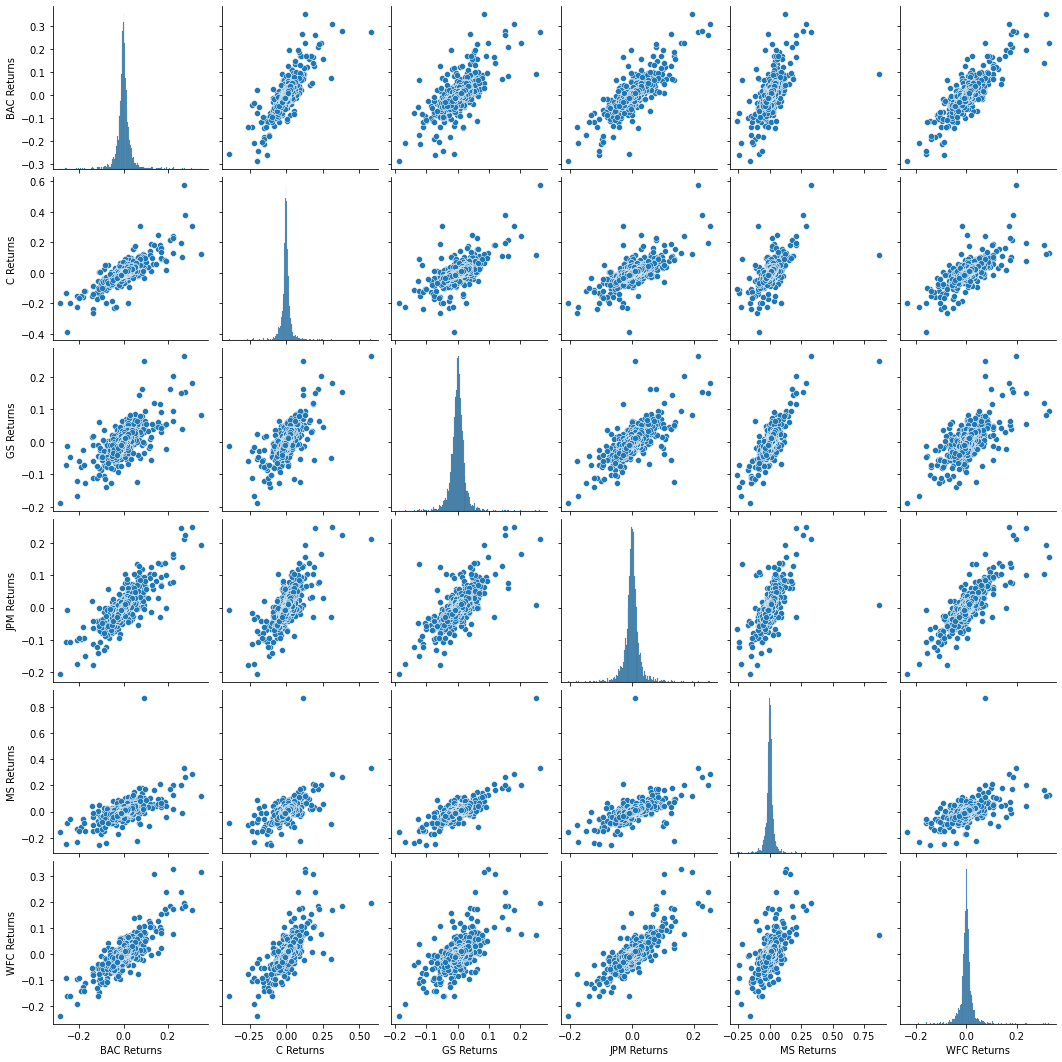

In [14]:
sns.pairplot(returns[1:])

* See solution for details about Citigroup behavior....

** Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns. You should notice that 4 of the banks share the same day for the worst drop, did anything significant happen that day?**

In [15]:
returns.idxmin()

BAC Returns   2009-01-20
C Returns     2009-02-27
GS Returns    2009-01-20
JPM Returns   2009-01-20
MS Returns    2008-10-09
WFC Returns   2009-01-20
dtype: datetime64[ns]

In [16]:
returns.idxmax()

BAC Returns   2009-04-09
C Returns     2008-11-24
GS Returns    2008-11-24
JPM Returns   2009-01-21
MS Returns    2008-10-13
WFC Returns   2008-07-16
dtype: datetime64[ns]

** You should have noticed that Citigroup's largest drop and biggest gain were very close to one another, did anythign significant happen in that time frame? **

** Take a look at the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period? Which would you classify as the riskiest for the year 2015?**

In [17]:
returns.std()

BAC Returns    0.036605
C Returns      0.038615
GS Returns     0.025371
JPM Returns    0.027670
MS Returns     0.037707
WFC Returns    0.030220
dtype: float64

In [97]:
returns.loc['2015-01-01':'2015-12-31'].std()

BAC Returns    0.016148
C Returns      0.015279
GS Returns     0.014028
JPM Returns    0.013964
MS Returns     0.016006
WFC Returns    0.012546
dtype: float64

** Create a histplot using seaborn of the 2015 returns for Morgan Stanley **

<AxesSubplot:xlabel='MS Returns', ylabel='Count'>

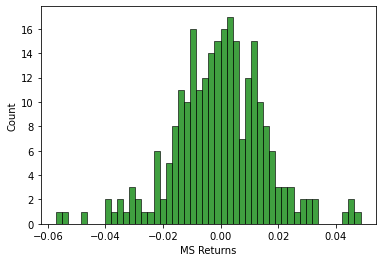

In [32]:
sns.histplot(returns.loc['2015-01-01':'2015-12-31']['MS Returns'], color='green', bins=50)

** Create a histogram using Matplotlib of the 2008 returns for CitiGroup **

(array([ 1.,  1.,  1.,  1.,  1.,  0.,  1.,  2.,  2.,  4.,  2., 10., 24.,
        24., 42., 37., 38., 24., 10.,  5.,  3.,  5.,  6.,  1.,  2.,  1.,
         3.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([-0.26406879, -0.24721988, -0.23037096, -0.21352205, -0.19667314,
        -0.17982422, -0.16297531, -0.1461264 , -0.12927748, -0.11242857,
        -0.09557966, -0.07873074, -0.06188183, -0.04503292, -0.02818401,
        -0.01133509,  0.00551382,  0.02236273,  0.03921165,  0.05606056,
         0.07290947,  0.08975839,  0.1066073 ,  0.12345621,  0.14030513,
         0.15715404,  0.17400295,  0.19085187,  0.20770078,  0.22454969,
         0.2413986 ,  0.25824752,  0.27509643,  0.29194534,  0.30879426,
         0.32564317,  0.34249208,  0.359341  ,  0.37618991,  0.39303882,
         0.40988774,  0.42673665,  0.44358556,  0.46043448,  0.47728339,
         0.4941323 ,  0.51098121,  0.52783013,  0.54467904,

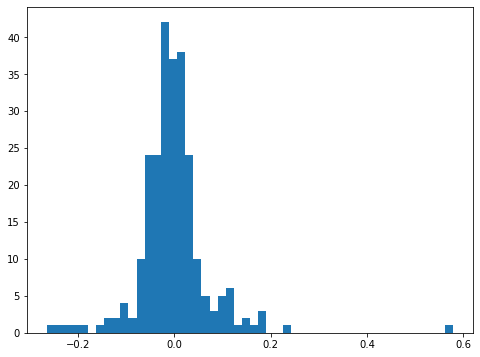

In [35]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.hist(returns.loc['2008-01-01':'2008-12-31']['C Returns'], bins =50 )

____
# More Visualization

A lot of this project will focus on visualizations. Feel free to use any of your preferred visualization libraries to try to recreate the described plots below, seaborn, matplotlib, plotly and cufflinks, or just pandas.

### Imports

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline


** Create a line plot showing Close price for each bank for the entire index of time. (Hint: Try using a for loop, or use [.xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html) to get a cross section of the data.)**

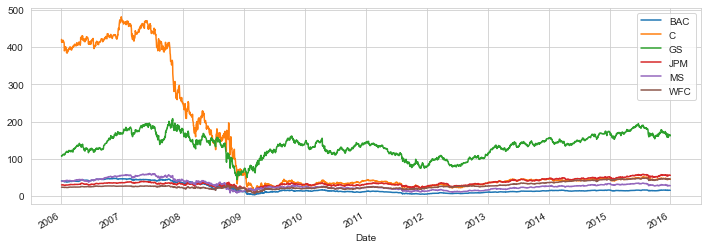

In [38]:
for t in tickers:
    bank_stocks[t]['Close'].plot(label=t, figsize=(12,4))
plt.legend()

<AxesSubplot:xlabel='Date'>

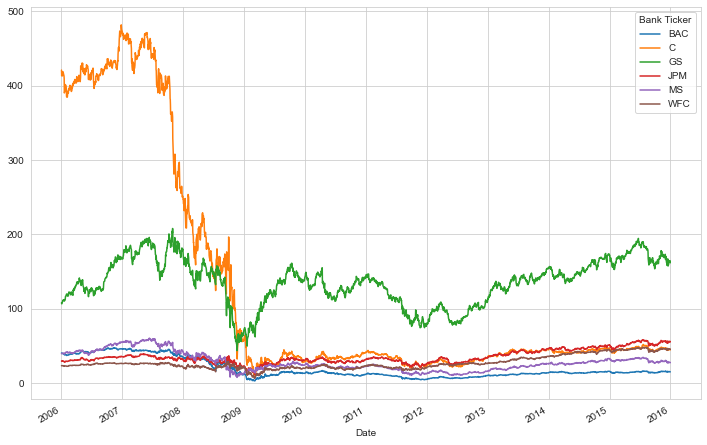

In [49]:
bank_stocks.xs(key ='Close', axis=1, level = 'Stock Info').plot(figsize=(12,8))

## Moving Averages

Let's analyze the moving averages for these stocks in the year 2008. 

** Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008**

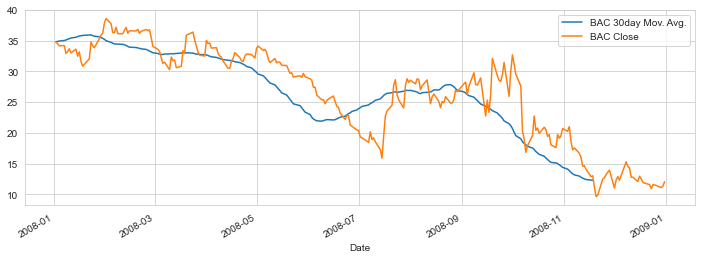

In [139]:
BAC['Close'].loc['2008'].rolling(window=30).mean().plot(label='BAC 30day Mov. Avg.', figsize=(12,4))
BAC['Close'].loc['2008'].plot(label = 'BAC Close')
plt.legend()

** Create a heatmap of the correlation between the stocks Close Price.**

<AxesSubplot:xlabel='Bank Ticker', ylabel='Bank Ticker'>

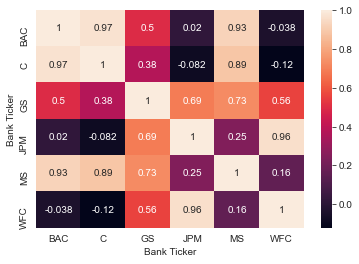

In [62]:
sns.heatmap(bank_stocks.xs(key='Close', axis=1, level='Stock Info').corr(),annot=True)

** Optional: Use seaborn's clustermap to cluster the correlations together:**

<Figure size 864x720 with 0 Axes>

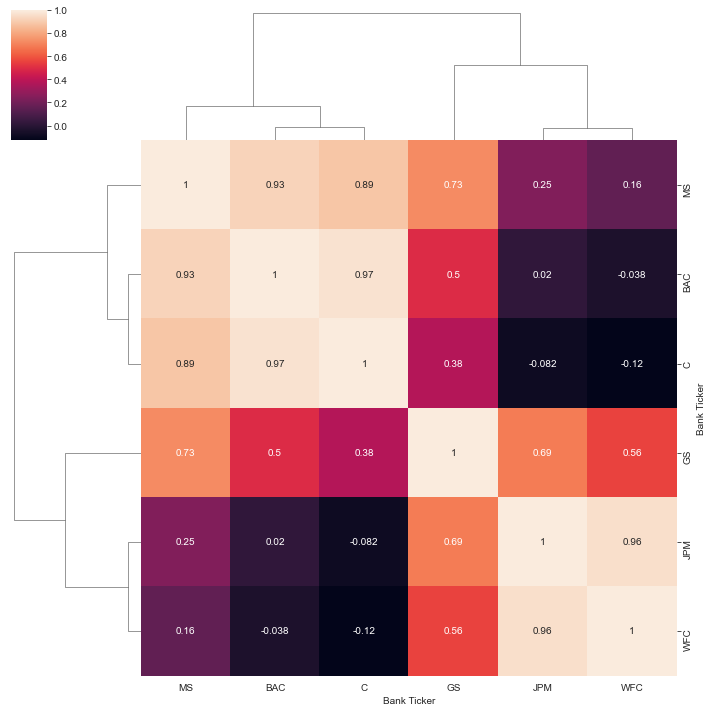

In [87]:
plt.figure(figsize=(12,10))
sns.clustermap(data= bank_stocks.xs(key= 'Close', axis=1, level = 'Stock Info').corr(),annot = True)